## Stock Market Trend Analysis for Nasadaq: ISRG
### In this notebook I have made LSTM- RNN based model to observe the trend in the stock price value of ISRG.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Uploading Data

In [24]:
data = pd.read_csv('ISRG_data.csv')
data.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,190.6731,193.2165,190.1831,192.9165,509604,ISRG
1,2013-02-11,191.9256,192.6465,189.4665,190.5065,770940,ISRG
2,2013-02-12,190.8815,191.2378,189.5098,190.4618,423156,ISRG
3,2013-02-13,190.2165,192.4165,190.1231,191.2331,337554,ISRG
4,2013-02-14,189.7398,191.1965,189.0231,190.4198,582456,ISRG


In [25]:
data.tail(5)

,date,open,high,low,close,volume,Name
1254,2018-02-01,432.61,433.13,423.3600,425.92,706539,ISRG
1255,2018-02-02,423.01,426.20,416.2701,416.96,939639,ISRG
1256,2018-02-05,415.67,417.00,399.0100,399.01,1255266,ISRG
1257,2018-02-06,390.68,412.57,385.5110,408.33,1571945,ISRG
1258,2018-02-07,407.12,410.88,396.3400,399.53,770645,ISRG


In [26]:
data.shape

(1259, 7)

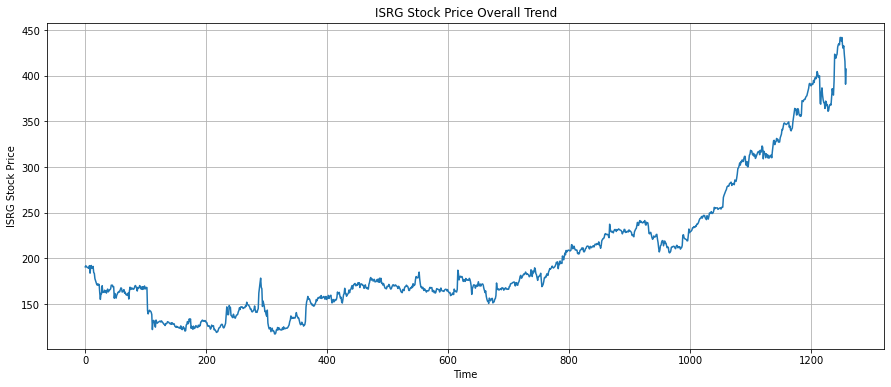

In [51]:
plt.figure(figsize=(15,6))
plt.plot(data.open)
plt.title('ISRG Stock Price Overall Trend')
plt.xlabel('Time')
plt.ylabel('ISRG Stock Price')
plt.grid()
plt.show()

## Splitting Data 
### Here I have splitted same csv file for training and testing purposes. 1100 rows are taken for training and 159 rows for testing which is equivalent of 92% of data to training and 8% to testing. This can be splitted based on the requirement for example if the last month's chart is to be predicted we can split from that point.

In [28]:
train = data.iloc[:1100, 1:2] 
test = data.iloc[1100:, 1:2]

In [29]:
train

,open
0,190.6731
1,191.9256
2,190.8815
3,190.2165
4,189.7398
...,...
1095,300.2464
1096,300.3197
1097,306.3030
1098,312.8997


In [30]:
test

,open
1100,318.2663
1101,316.9630
1102,317.4530
1103,313.7564
1104,312.9230
...,...
1254,432.6100
1255,423.0100
1256,415.6700
1257,390.6800


## Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)

In [32]:
X_train = []
y_train = [] 
for i in range(60, 1100): 
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Algorithm

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [35]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [36]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 9s 75ms/step - loss: 0.0288
Epoch 2/100
33/33 [==============================] - 2s 75ms/step - loss: 0.0049
Epoch 3/100
33/33 [==============================] - 3s 76ms/step - loss: 0.0041
Epoch 4/100
33/33 [==============================] - 3s 82ms/step - loss: 0.0034
Epoch 5/100
33/33 [==============================] - 2s 72ms/step - loss: 0.0030
Epoch 6/100
33/33 [==============================] - 2s 71ms/step - loss: 0.0032
Epoch 7/100
33/33 [==============================] - 2s 75ms/step - loss: 0.0033
Epoch 8/100
33/33 [==============================] - 3s 76ms/step - loss: 0.0038
Epoch 9/100
33/33 [==============================] - 2s 71ms/step - loss: 0.0027
Epoch 10/100
33/33 [==============================] - 2s 71ms/step - loss: 0.0027
Epoch 11/100
33/33 [==============================] - 3s 77ms/step - loss: 0.0027
Epoch 12/100
33/33 [==============================] - 2s 75ms/step - loss: 0.0028
Epoch 13/100
33/33 [=====

33/33 [==============================] - 2s 74ms/step - loss: 0.0010


## Customizing Test Data

In [38]:
test.head(5)

,open
1100,318.2663
1101,316.9630
1102,317.4530
1103,313.7564
1104,312.9230


In [39]:
test.reset_index(inplace=True)

In [40]:
test.drop('index', axis=1, inplace=True)

In [41]:
test.head()

,open
0,318.2663
1,316.9630
2,317.4530
3,313.7564
4,312.9230


In [42]:
dataset_total = pd.concat((train['open'], test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 219): 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


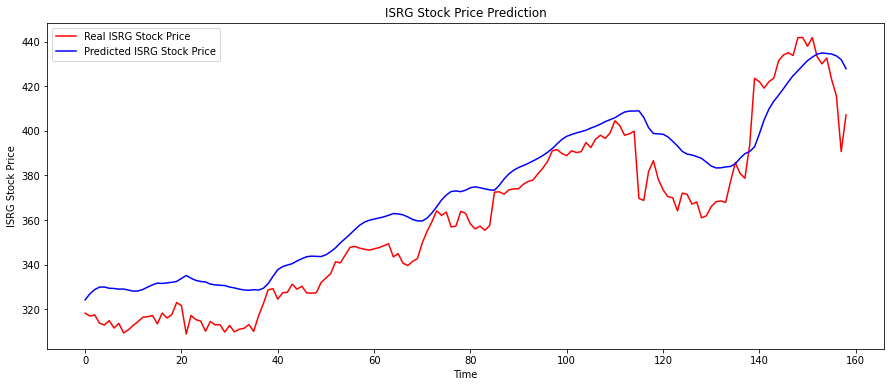

In [43]:
plt.figure(figsize=(15,6))
plt.plot(test, color = 'red', label = 'Real ISRG Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ISRG Stock Price')
plt.title('ISRG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ISRG Stock Price')
plt.legend()
plt.show()